In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/"Colab Notebooks"/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ramjidoolla/ipl-data-set

 81% 1.00M/1.24M [00:00<00:00, 2.00MB/s]
100% 1.24M/1.24M [00:00<00:00, 2.37MB/s]


In [ ]:
!unzip /content/ipl-data-set.zip

Archive:  /content/ipl-data-set.zip
  inflating: Players.xlsx            
  inflating: deliveries.csv          
  inflating: matches.csv             
  inflating: most_runs_average_strikerate.csv  
  inflating: teams.csv               
  inflating: teamwise_home_and_away.csv  


In [ ]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [ ]:
for files in os.listdir('/content'):
  if (files[-3:] == 'csv' or files[-4:] == 'xlsx') and (files not in ['matches.csv','deliveries.csv']):
    deletefile = os.path.join('/content',files)
    print(deletefile)
    os.remove(deletefile)

/content/teamwise_home_and_away.csv
/content/teams.csv
/content/most_runs_average_strikerate.csv
/content/Players.xlsx


In [ ]:
matches.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum(numeric_only=True)['total_runs'].reset_index()

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [ ]:
match_df = matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on = 'match_id')

In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams = ['Sunrisers Hyderabad',
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals']

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(641, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum(numeric_only=True)['total_runs_y']

In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] + 1

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum(numeric_only=True)['player_dismissed'].values
delivery_df['wickets_left'] = 10-wickets
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [ ]:
delivery_df['curr'] = (delivery_df['current_score'] * 6)/(120-delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = delivery_df['runs_left']*6/(delivery_df['balls_left'])

In [ ]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis = 1)

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','curr','rrr','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,curr,rrr,result
2414,Kolkata Knight Riders,Delhi Daredevils,Delhi,9,7,5,168,8.495575,7.714286,1


In [ ]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets_left      0
total_runs_x      0
curr              0
rrr               5
result            0
dtype: int64

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

# Train Test Split

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,curr,rrr
42303,Mumbai Indians,Chennai Super Kings,Chennai,76,32,3,165,6.136364,14.250000
55936,Mumbai Indians,Deccan Chargers,Mumbai,78,45,6,135,4.640000,10.400000
96125,Delhi Daredevils,Rajasthan Royals,Ahmedabad,149,68,6,201,6.115385,13.147059
47704,Mumbai Indians,Chennai Super Kings,Mumbai,168,112,10,168,0.750000,9.000000
69779,Mumbai Indians,Kolkata Knight Riders,Mumbai,106,79,9,140,5.121951,8.050633
...,...,...,...,...,...,...,...,...,...
85555,Sunrisers Hyderabad,Kolkata Knight Riders,Hyderabad,52,58,10,130,7.645161,5.379310
86792,Mumbai Indians,Kolkata Knight Riders,Abu Dhabi,77,35,8,163,6.141176,13.200000
18463,Chennai Super Kings,Rajasthan Royals,Chennai,144,81,9,211,10.461538,10.666667
120177,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,132,91,10,183,10.758621,8.703297


# One Hot Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

#Creating Pipelining

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps = [
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
logistic_pipe = pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_pred1 = logistic_pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8003363935804891

In [ ]:
pipe = Pipeline(steps = [
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [ ]:
random_output = pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_pred2 = random_output.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9989487700609714

In [ ]:
prob = logistic_pipe.predict_proba(X_test)[4]

In [ ]:
prob

array([0.5920724, 0.4079276])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','curr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [ ]:
temp_df,target = match_progression(delivery_df,74,logistic_pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,3,0,56.9,43.1
10467,2,8,0,51.7,48.3
10473,3,1,0,58.4,41.6
10479,4,7,1,70.1,29.9
10485,5,12,0,60.1,39.9
10491,6,13,0,47.8,52.2
10497,7,9,0,41.8,58.2
10505,8,15,0,27.9,72.1
10511,9,7,0,25.7,74.3
10518,10,17,0,14.1,85.9


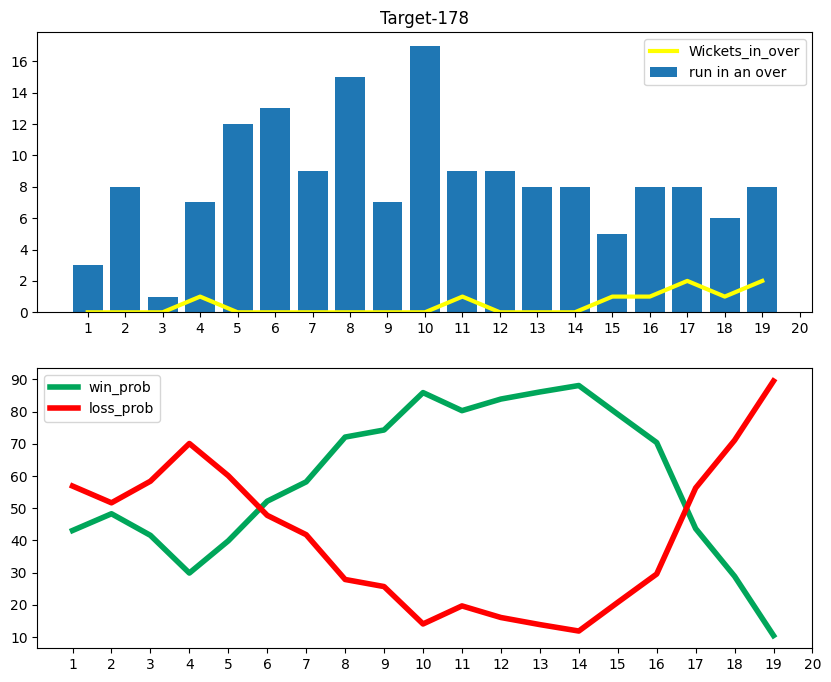

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3,label='Wickets_in_over')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],label='run in an over')
plt.xticks(range(1,21,1))
plt.title('Target-' + str(target))
plt.legend()
plt.subplot(2,1,2)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4,label = 'win_prob')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label = 'loss_prob')
plt.xticks(range(1,21,1))
plt.legend()

In [ ]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [ ]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
import pickle
pickle.dump(logistic_pipe,open('pipe.pkl','wb'))